In [14]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [4]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [5]:
target = "default"
X = df.drop(columns=[target]) # Features

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df[target]) # Label/outcome/target


# One hot Encoding - converts the categorical data into numeric
X = pd.get_dummies(X, drop_first=True)
features = X.columns

# X.values returns numpy array for the dataframe
# astype converts each feature to floating point number
X = X.values.astype("float")

# Divide the dataset into training and test
# Model is trained on training set 
# Model is evaluated on the test set
# Model has not seen the test data and assuming test records is a good 
# representation of future, we can get an idea how the model will perform
# in production
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)



pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=2
    #                                          , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(solver="liblinear"))
])


pipe.fit(X_train, y_train) 
# training is happening to build the model
# Essetially, the coefficients/weights/parameters values are calculated

# Doing the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("training accuracy:"
      , metrics.accuracy_score(y_train, y_train_pred))

print("test accuracy:"
      , metrics.accuracy_score(y_test, y_test_pred))

print(metrics.confusion_matrix(y_test, y_test_pred))

training accuracy: 0.7957142857142857
test accuracy: 0.7566666666666667
[[188  26]
 [ 47  39]]


In [8]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
print(metrics.confusion_matrix(y_test, y_test_pred))
print("accuracy", metrics.accuracy_score(y_test, y_test_pred))

[[188  26]
 [ 47  39]]
accuracy 0.7566666666666667


In [9]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.8, 1, 0)
print(metrics.confusion_matrix(y_test, y_test_pred))
print("accuracy", metrics.accuracy_score(y_test, y_test_pred))

[[209   5]
 [ 71  15]]
accuracy 0.7466666666666667


In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

In [11]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.01401869, 0.01401869, 0.02336449,
        0.02336449, 0.03738318, 0.03738318, 0.04672897, 0.04672897,
        0.05140187, 0.05140187, 0.06542056, 0.06542056, 0.07009346,
        0.07009346, 0.07943925, 0.07943925, 0.09345794, 0.09345794,
        0.09813084, 0.09813084, 0.11214953, 0.11214953, 0.12149533,
        0.12149533, 0.13084112, 0.13084112, 0.14018692, 0.14018692,
        0.14485981, 0.14485981, 0.1635514 , 0.1635514 , 0.1728972 ,
        0.1728972 , 0.19158879, 0.19158879, 0.19626168, 0.19626168,
        0.20560748, 0.20560748, 0.22429907, 0.22429907, 0.22897196,
        0.22897196, 0.26168224, 0.26168224, 0.29906542, 0.29906542,
        0.30373832, 0.30373832, 0.31775701, 0.31775701, 0.3271028 ,
        0.3271028 , 0.34579439, 0.34579439, 0.37383178, 0.37383178,
        0.42990654, 0.42990654, 0.44392523, 0.44392523, 0.45794393,
        0.45794393, 0.46728972, 0.46728972, 0.47196262, 0.47196262,
        0.51401869, 0.51401869, 0.55607477, 0.55

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'ROC, auc: 0.758476418169963')

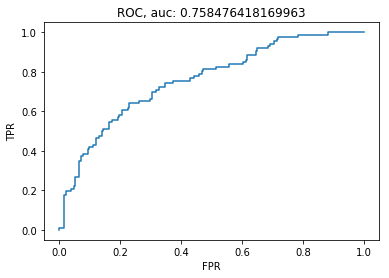

In [16]:
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, auc: " + str(auc))